We are two UIUC students from Indonesia that is attempting to predict air quality trends in Jakarta. 

## Importing Libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Cleaning The Data

In [86]:
df = pd.read_csv('dataset/airquality-data.csv')
df.drop(columns=['periode_data'])
df

,periode_data,tanggal,pm_10,pm_duakomalima,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,202212,2022-12-02,60,94,52,18,42,30,94,"PM2,5",SEDANG,DKI4
1,202212,2022-12-03,60,100,52,16,49,31,100,"PM2,5",SEDANG,DKI4
2,202212,2022-12-04,65,95,52,19,45,34,95,"PM2,5",SEDANG,DKI4
3,202212,2022-12-05,74,117,52,19,48,33,117,"PM2,5",TIDAK SEHAT,DKI4
4,202212,2022-12-06,70,107,49,24,41,44,107,"PM2,5",TIDAK SEHAT,DKI4
...,...,...,...,...,...,...,...,...,...,...,...,...
360,202201,2022-01-16,67,102,47,20,65,32,102,"PM2,5",TIDAK SEHAT,DKI5
361,202201,2022-01-15,55,69,51,15,68,29,69,"PM2,5",SEDANG,DKI3
362,202201,2022-01-14,46,63,48,15,63,32,63,"PM2,5",SEDANG,DKI2
363,202201,2022-01-13,38,62,52,15,63,32,63,O3,SEDANG,DKI2


Translating the Data

In [87]:
translations = {
    'periode_data': 'Data Period',
    'tanggal' : 'Date',
    'pm_10' : 'PM 10',
    'so2' : 'SO2',
    'co' : 'CO',
    'o3' : 'O3',
    'no2' : 'NO2',
    'max' : 'Max',
    'critical' : 'Critical',
    'pm_duakomalima' : 'PM 2.5',
    'lokasi_spku' : 'Station Location',
    'categori' : 'Category'
}
df.rename(columns=translations, inplace=True)

category_translation = {
    'SEDANG': 'MODERATE',
    'TIDAK SEHAT' : 'POOR',
    'BAIK' : 'GOOD',
}
df['Category'] = df['Category'].replace(category_translation)

station_location_translation = {
    '0' : '0',
    'DKI1' : 'DKI1 (Bunderan HI)',
    'DKI2' : 'DKI2 (Kelapa Gading)',
    'DKI3' : 'DKI3 (Jagakarsa)',
    'DKI4' : 'DKI4 (Lubang Buaya)',
    'DKI5' : 'DKI5 (Kebon Jeruk)'
}

df['Station Location'] = df['Station Location'].replace(station_location_translation)
df

,Data Period,Date,PM 10,PM 2.5,SO2,CO,O3,NO2,Max,Critical,Category,Station Location
0,202212,2022-12-02,60,94,52,18,42,30,94,"PM2,5",MODERATE,DKI4 (Lubang Buaya)
1,202212,2022-12-03,60,100,52,16,49,31,100,"PM2,5",MODERATE,DKI4 (Lubang Buaya)
2,202212,2022-12-04,65,95,52,19,45,34,95,"PM2,5",MODERATE,DKI4 (Lubang Buaya)
3,202212,2022-12-05,74,117,52,19,48,33,117,"PM2,5",POOR,DKI4 (Lubang Buaya)
4,202212,2022-12-06,70,107,49,24,41,44,107,"PM2,5",POOR,DKI4 (Lubang Buaya)
...,...,...,...,...,...,...,...,...,...,...,...,...
360,202201,2022-01-16,67,102,47,20,65,32,102,"PM2,5",POOR,DKI5 (Kebon Jeruk)
361,202201,2022-01-15,55,69,51,15,68,29,69,"PM2,5",MODERATE,DKI3 (Jagakarsa)
362,202201,2022-01-14,46,63,48,15,63,32,63,"PM2,5",MODERATE,DKI2 (Kelapa Gading)
363,202201,2022-01-13,38,62,52,15,63,32,63,O3,MODERATE,DKI2 (Kelapa Gading)


finding coordinate for each station

Translating category column

In [88]:
df = df.sort_values(by = 'Date', ascending = True).reset_index(drop = True)
df

,Data Period,Date,PM 10,PM 2.5,SO2,CO,O3,NO2,Max,Critical,Category,Station Location
0,202202,2020-02-01,64,89,52,13,76,21,89,"PM2,5",MODERATE,DKI3 (Jagakarsa)
1,202202,2020-02-02,66,101,47,22,64,26,101,"PM2,5",POOR,DKI4 (Lubang Buaya)
2,202202,2020-02-03,58,99,48,20,65,33,99,"PM2,5",MODERATE,DKI4 (Lubang Buaya)
3,202202,2020-02-04,54,72,46,12,68,27,72,"PM2,5",MODERATE,DKI3 (Jagakarsa)
4,202202,2020-02-05,43,62,53,18,55,30,62,"PM2,5",MODERATE,DKI5 (Kebon Jeruk)
...,...,...,...,...,...,...,...,...,...,...,...,...
360,202212,2022-12-27,36,47,58,42,20,18,58,SO2,MODERATE,DKI2 (Kelapa Gading)
361,202212,2022-12-28,46,66,57,41,15,19,66,"PM2,5",MODERATE,DKI3 (Jagakarsa)
362,202212,2022-12-29,23,50,57,12,16,15,57,SO2,MODERATE,DKI2 (Kelapa Gading)
363,202212,2022-12-30,40,64,57,21,17,24,64,"PM2,5",MODERATE,DKI4 (Lubang Buaya)


In [89]:
df2 = df.drop(364)
df = df2
df




,Data Period,Date,PM 10,PM 2.5,SO2,CO,O3,NO2,Max,Critical,Category,Station Location
0,202202,2020-02-01,64,89,52,13,76,21,89,"PM2,5",MODERATE,DKI3 (Jagakarsa)
1,202202,2020-02-02,66,101,47,22,64,26,101,"PM2,5",POOR,DKI4 (Lubang Buaya)
2,202202,2020-02-03,58,99,48,20,65,33,99,"PM2,5",MODERATE,DKI4 (Lubang Buaya)
3,202202,2020-02-04,54,72,46,12,68,27,72,"PM2,5",MODERATE,DKI3 (Jagakarsa)
4,202202,2020-02-05,43,62,53,18,55,30,62,"PM2,5",MODERATE,DKI5 (Kebon Jeruk)
...,...,...,...,...,...,...,...,...,...,...,...,...
359,202212,2022-12-26,43,62,58,54,25,27,62,"PM2,5",MODERATE,DKI2 (Kelapa Gading)
360,202212,2022-12-27,36,47,58,42,20,18,58,SO2,MODERATE,DKI2 (Kelapa Gading)
361,202212,2022-12-28,46,66,57,41,15,19,66,"PM2,5",MODERATE,DKI3 (Jagakarsa)
362,202212,2022-12-29,23,50,57,12,16,15,57,SO2,MODERATE,DKI2 (Kelapa Gading)


In [90]:
df.replace('null', np.NaN, inplace=True)
df

,Data Period,Date,PM 10,PM 2.5,SO2,CO,O3,NO2,Max,Critical,Category,Station Location
0,202202,2020-02-01,64,89,52,13,76,21,89,"PM2,5",MODERATE,DKI3 (Jagakarsa)
1,202202,2020-02-02,66,101,47,22,64,26,101,"PM2,5",POOR,DKI4 (Lubang Buaya)
2,202202,2020-02-03,58,99,48,20,65,33,99,"PM2,5",MODERATE,DKI4 (Lubang Buaya)
3,202202,2020-02-04,54,72,46,12,68,27,72,"PM2,5",MODERATE,DKI3 (Jagakarsa)
4,202202,2020-02-05,43,62,53,18,55,30,62,"PM2,5",MODERATE,DKI5 (Kebon Jeruk)
...,...,...,...,...,...,...,...,...,...,...,...,...
359,202212,2022-12-26,43,62,58,54,25,27,62,"PM2,5",MODERATE,DKI2 (Kelapa Gading)
360,202212,2022-12-27,36,47,58,42,20,18,58,SO2,MODERATE,DKI2 (Kelapa Gading)
361,202212,2022-12-28,46,66,57,41,15,19,66,"PM2,5",MODERATE,DKI3 (Jagakarsa)
362,202212,2022-12-29,23,50,57,12,16,15,57,SO2,MODERATE,DKI2 (Kelapa Gading)


## Understanding the data

In [91]:
df2.head()

,Data Period,Date,PM 10,PM 2.5,SO2,CO,O3,NO2,Max,Critical,Category,Station Location
0,202202,2020-02-01,64,89,52,13,76,21,89,"PM2,5",MODERATE,DKI3 (Jagakarsa)
1,202202,2020-02-02,66,101,47,22,64,26,101,"PM2,5",POOR,DKI4 (Lubang Buaya)
2,202202,2020-02-03,58,99,48,20,65,33,99,"PM2,5",MODERATE,DKI4 (Lubang Buaya)
3,202202,2020-02-04,54,72,46,12,68,27,72,"PM2,5",MODERATE,DKI3 (Jagakarsa)
4,202202,2020-02-05,43,62,53,18,55,30,62,"PM2,5",MODERATE,DKI5 (Kebon Jeruk)


In [92]:
df.tail()

,Data Period,Date,PM 10,PM 2.5,SO2,CO,O3,NO2,Max,Critical,Category,Station Location
359,202212,2022-12-26,43,62,58,54,25,27,62,"PM2,5",MODERATE,DKI2 (Kelapa Gading)
360,202212,2022-12-27,36,47,58,42,20,18,58,SO2,MODERATE,DKI2 (Kelapa Gading)
361,202212,2022-12-28,46,66,57,41,15,19,66,"PM2,5",MODERATE,DKI3 (Jagakarsa)
362,202212,2022-12-29,23,50,57,12,16,15,57,SO2,MODERATE,DKI2 (Kelapa Gading)
363,202212,2022-12-30,40,64,57,21,17,24,64,"PM2,5",MODERATE,DKI4 (Lubang Buaya)


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Data Period       364 non-null    int64 
 1   Date              364 non-null    object
 2   PM 10             364 non-null    int64 
 3   PM 2.5            364 non-null    int64 
 4   SO2               364 non-null    int64 
 5   CO                364 non-null    int64 
 6   O3                364 non-null    int64 
 7   NO2               364 non-null    int64 
 8   Max               364 non-null    int64 
 9   Critical          363 non-null    object
 10  Category          364 non-null    object
 11  Station Location  364 non-null    object
dtypes: int64(8), object(4)
memory usage: 34.2+ KB


In [94]:
df.shape

(364, 12)

The dataset used in this model is taken from the Jakarta Open Data Website. It contains information about the Air Pollution Quality Index (APSI) measured by 5 air quality monitoring systems (AQMS) in the DKI Jakarta province for the year 2022.

Dataset components:

1. Date: Data of air quality measurement
2. PM 10: Particulate matter, one of the monitored parameters
3. PM 2.5: Particulate matter with a size below 2.5 microns, one of the monitored parameters
4. SO2: Sulfide, one of the monitored parameters
5. CO: Carbon Monoxide, one of the monitored parameters
6. O3: Ozone, one of the monitored parameters
7. NO2: Nitrogen dioxide, one of the monitored parameters
8. Max: Highest measurement value from all parameters measured at the same time
9. Critical: Parameter with the highest measurement value
10. Station Location: Air Quality Monitoring Systems Location

In [95]:
df.describe()

,Data Period,PM 10,PM 2.5,SO2,CO,O3,NO2,Max
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,202206.510989,59.835165,92.994505,47.903846,18.409341,57.337912,28.766484,93.909341
std,3.445345,13.344979,24.432512,4.556240,7.101392,23.308296,8.685689,24.444800
min,202201.000000,23.000000,40.000000,37.000000,7.000000,15.000000,6.000000,49.000000
25%,202204.000000,52.000000,75.000000,44.000000,14.000000,39.000000,23.000000,76.000000
50%,202207.000000,60.000000,92.000000,49.000000,17.000000,54.000000,28.000000,93.000000
75%,202209.250000,68.250000,111.000000,51.000000,21.000000,71.250000,34.000000,111.250000
max,202212.000000,95.000000,165.000000,62.000000,55.000000,181.000000,52.000000,181.000000


In [96]:

df = df[df.Critical != 'null']
df

,Data Period,Date,PM 10,PM 2.5,SO2,CO,O3,NO2,Max,Critical,Category,Station Location
0,202202,2020-02-01,64,89,52,13,76,21,89,"PM2,5",MODERATE,DKI3 (Jagakarsa)
1,202202,2020-02-02,66,101,47,22,64,26,101,"PM2,5",POOR,DKI4 (Lubang Buaya)
2,202202,2020-02-03,58,99,48,20,65,33,99,"PM2,5",MODERATE,DKI4 (Lubang Buaya)
3,202202,2020-02-04,54,72,46,12,68,27,72,"PM2,5",MODERATE,DKI3 (Jagakarsa)
4,202202,2020-02-05,43,62,53,18,55,30,62,"PM2,5",MODERATE,DKI5 (Kebon Jeruk)
...,...,...,...,...,...,...,...,...,...,...,...,...
359,202212,2022-12-26,43,62,58,54,25,27,62,"PM2,5",MODERATE,DKI2 (Kelapa Gading)
360,202212,2022-12-27,36,47,58,42,20,18,58,SO2,MODERATE,DKI2 (Kelapa Gading)
361,202212,2022-12-28,46,66,57,41,15,19,66,"PM2,5",MODERATE,DKI3 (Jagakarsa)
362,202212,2022-12-29,23,50,57,12,16,15,57,SO2,MODERATE,DKI2 (Kelapa Gading)


<Axes: xlabel='Date'>

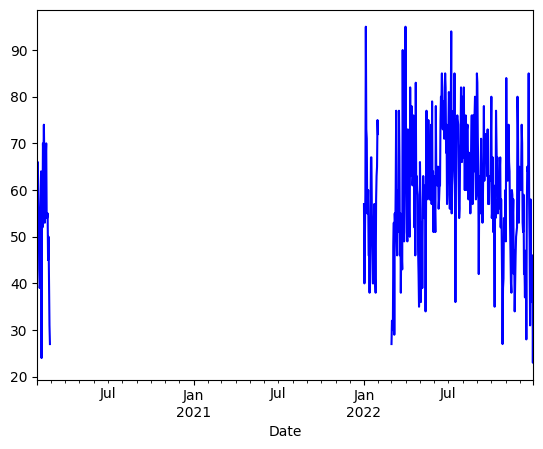

In [97]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
numerical_columns = df.select_dtypes(include=['number']).columns
df_resampled = df[numerical_columns].resample('D').mean()
df_resampled['PM 10'].plot(kind='line', color='blue')


# Handling Outliers